In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df=pd.read_csv('balanced_data.csv')
df

,Review,Rating
0,"These shorts are very sheer and lightweight, b...",1.0
1,Sent back. Poor quality.,1.0
2,I bought this dress because i saw it in stores...,1.0
3,After playing one tournament the pants already...,1.0
4,Too tight and the material felt cheap,1.0
...,...,...
9995,This fit my fiancé perfect. Got him a Large. H...,5.0
9996,Washes well without shrinking. Good fit.,5.0
9997,It's suit looked great on him!!!! Jacket and ...,5.0
9998,I wore this to a conference and I received so ...,5.0


In [28]:
df.isnull().any()

Review    False
Rating    False
dtype: bool

In [29]:
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


In [30]:
# Shuffle the balanced DataFrame
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [31]:
df

,Review,Rating
0,only sleeves were a little long but easily hem...,4.0
1,One wash wonder...i'm a s to m and went with a...,3.0
2,Ordered a medium and these run extremely tight...,1.0
3,"I'm 5 11, 183 lbs on the muscular side. I boug...",3.0
4,I think these are meant for people who are ove...,3.0
...,...,...
9995,I normally wear a 10 or 12. Bought these in a ...,3.0
9996,Decent quality lounge shorts at a reasonable p...,3.0
9997,"I am normally a m-l (170 lbs, 5'4"", 34dd). i o...",3.0
9998,I ordered this to wear for a holiday party hop...,1.0


In [9]:
from sklearn.model_selection import train_test_split

In [32]:
x=df['Review']
y=df['Rating']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

In [34]:
#removing punctuations and making lower case
X_train = X_train.str.lower()
X_train = X_train.str.replace(r'\[.*?\]', '', regex=True)


In [35]:
import re

def clean_text(text):
    text = str(text)
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # remove URLs
    text = re.sub(r'<.*?>', '', text)  # remove HTML tags
    text = re.sub(r'[\U00010000-\U0010ffff]', '', text)  # remove emojis
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # remove extra whitespace
    return text


In [36]:
X_train=X_train.apply(clean_text)

In [37]:
X_train

2203    the shirt easily wrinkles is extremely sheer a...
9737    love the style and cut of this top but fabric ...
8977    these rain pants will mostly keep you dry the ...
8396                               these were see through
4713    i ordered this top online during the mothers d...
                              ...                        
820                     i only got pants without a jacket
7134                                      3x is morike xl
1276    wife says she is keeping it because she loves ...
97                        it was just to small for my son
9958                                    fits true to size
Name: Review, Length: 8000, dtype: object

In [16]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [17]:
#lemmatization and stop word removal
def cleaning(text):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc if not token.is_stop])

In [38]:
X_train=X_train.apply(cleaning)

In [39]:
#removing punctuations and making lower case
X_test = X_test.str.lower()
X_test = X_test.str.replace(r'\[.*?\]', '', regex=True)


In [40]:
X_test=X_test.apply(clean_text)

In [41]:
X_test=X_test.apply(cleaning)

In [42]:
train_df = pd.DataFrame({'Review': X_train, 'Rating': y_train})
test_df = pd.DataFrame({'Review': X_test, 'Rating': y_test})

In [43]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 4220 to 4630
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Review  2000 non-null   object 
 1   Rating  2000 non-null   float64
dtypes: float64(1), object(1)
memory usage: 46.9+ KB


In [50]:
#Filter out reviews with: Fewer than 3 words and Excessively long text

train_df['Word_Count'] = train_df['Review'].astype(str).apply(lambda x: len(x.split()))
train_df = train_df[(train_df['Word_Count'] >= 3) & (train_df['Word_Count'] <= 100)]


X_train = train_df['Review']
y_train = train_df['Rating']

In [51]:
#Filter out reviews with: Fewer than 3 words and Excessively long text
test_df['Word_Count'] = test_df['Review'].astype(str).apply(lambda x: len(x.split()))
test_df = test_df[(test_df['Word_Count'] >= 3) & (test_df['Word_Count'] <= 100)]


X_test = test_df['Review']
y_test = test_df['Rating']

In [44]:
from sklearn.feature_extraction.text import  TfidfVectorizer

In [52]:
# TF-IDF Vectorization
tv = TfidfVectorizer()
Xtrain_vec = tv.fit_transform(X_train)
Xtest_vec = tv.transform(X_test)

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

 Logistic Regression:
Accuracy: 0.44718864950078824
Classification Report:
               precision    recall  f1-score   support

         1.0       0.49      0.56      0.52       371
         2.0       0.38      0.33      0.35       382
         3.0       0.36      0.32      0.34       383
         4.0       0.40      0.43      0.42       387
         5.0       0.58      0.60      0.59       380

    accuracy                           0.45      1903
   macro avg       0.44      0.45      0.44      1903
weighted avg       0.44      0.45      0.44      1903



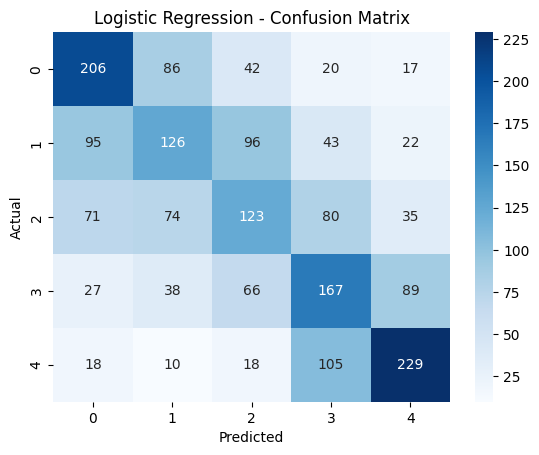

In [66]:
# Train Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(Xtrain_vec, y_train)

# Predict
y_pred_lr = lr.predict(Xtest_vec)

# Evaluation
print(" Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [65]:
new_review = ["great dress"]

# Preprocess and vectorize the new review
new_vec = tv.transform(new_review)

# Predict
predicted_rating = lr.predict(new_vec)
print("Predicted Rating:", predicted_rating[0])

Predicted Rating: 5.0


📌 Naive Bayes:
Accuracy: 0.4366789280084078
Classification Report:
               precision    recall  f1-score   support

         1.0       0.56      0.44      0.50       371
         2.0       0.34      0.29      0.32       382
         3.0       0.34      0.37      0.35       383
         4.0       0.37      0.53      0.44       387
         5.0       0.65      0.55      0.59       380

    accuracy                           0.44      1903
   macro avg       0.45      0.44      0.44      1903
weighted avg       0.45      0.44      0.44      1903



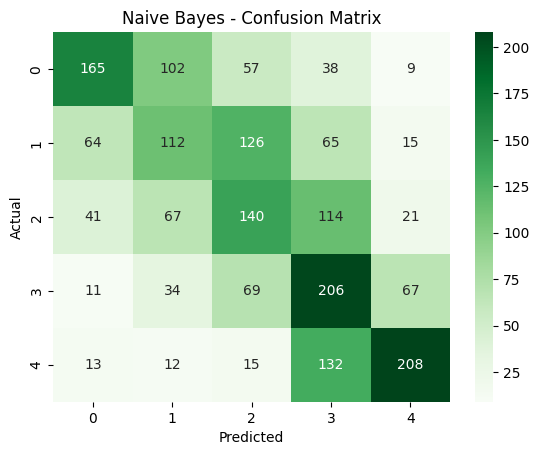

In [54]:
from sklearn.naive_bayes import MultinomialNB

# Train Naive Bayes
nb = MultinomialNB()
nb.fit(Xtrain_vec, y_train)

# Predict
y_pred_nb = nb.predict(Xtest_vec)

# Evaluation
print("📌 Naive Bayes:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt="d", cmap="Greens")
plt.title("Naive Bayes - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


📌 Support Vector Machine (SVM):
Accuracy: 0.41986337362059906
Classification Report:
               precision    recall  f1-score   support

         1.0       0.51      0.56      0.53       371
         2.0       0.34      0.31      0.32       382
         3.0       0.30      0.25      0.28       383
         4.0       0.36      0.39      0.37       387
         5.0       0.56      0.60      0.58       380

    accuracy                           0.42      1903
   macro avg       0.41      0.42      0.42      1903
weighted avg       0.41      0.42      0.41      1903



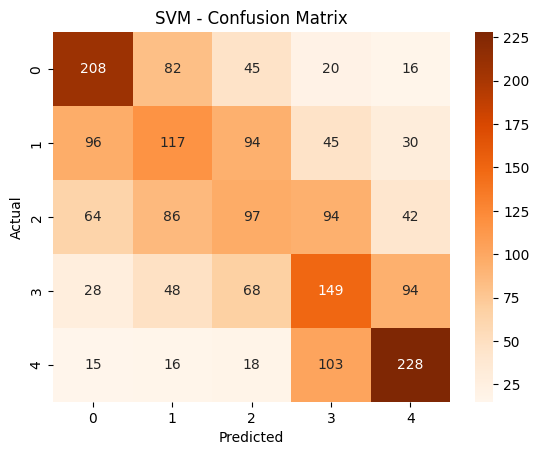

In [55]:
from sklearn.svm import LinearSVC

# Train SVM
svm = LinearSVC()
svm.fit(Xtrain_vec, y_train)

# Predict
y_pred_svm = svm.predict(Xtest_vec)

# Evaluation
print("📌 Support Vector Machine (SVM):")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt="d", cmap="Oranges")
plt.title("SVM - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],               # Regularization strength
    'penalty': ['l1', 'l2'],               # L1 = Lasso, L2 = Ridge
    'solver': ['liblinear', 'saga']        # Compatible solvers
}

# Create base model
lr = LogisticRegression(max_iter=1000)

# Grid search
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(Xtrain_vec, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Best model
best_lr = grid_search.best_estimator_

# Predict using best model
y_pred = best_lr.predict(Xtest_vec)

# Evaluate
from sklearn.metrics import accuracy_score, classification_report
print("✅ Accuracy after tuning:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))


Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
✅ Accuracy after tuning: 0.44981607987388333

📋 Classification Report:
               precision    recall  f1-score   support

         1.0       0.50      0.60      0.54       371
         2.0       0.39      0.30      0.34       382
         3.0       0.35      0.31      0.33       383
         4.0       0.40      0.43      0.41       387
         5.0       0.57      0.63      0.60       380

    accuracy                           0.45      1903
   macro avg       0.44      0.45      0.44      1903
weighted avg       0.44      0.45      0.44      1903



C:\Users\LENOVO\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1288: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
